<a href="https://colab.research.google.com/github/Sara19598/Clustering-Analysis-on-Movies-TV-shows-Unsupervised-ML/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

Importing Libraries

In [84]:
#loading the Required libraries-
import numpy as np                   # linear algebra & Extensively used to load and wrangle with the dataset.
import pandas as pd                  # data processing & For some math operations in predictions
import matplotlib.pyplot as plt      # Used for visualization.
import seaborn as sns                # Used for visualization.
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import missingno as mno             # install  pip install missingno
import warnings                     # For filtering and ignoring the warnings.
warnings.filterwarnings('ignore')
from scipy import stats             # used for statistical analysis
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")


In [85]:
# Mounting Drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:

# Loading the dataset of csv file-
nf=pd.read_csv('/content/drive/MyDrive/Capstone Project 4- Unsupervised ML - Netflix & Tv shows clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

# ***Data Summary***

- Size of the dataset.
- Printing few rows of it.
- What type of feature in our dataset.

In [87]:
#To view the dataset 
nf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [88]:
nf.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [89]:
#Shape of the dataset
nf.shape

(7787, 12)

In [90]:
#To get the columns of the dataset
nf.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [91]:
# number of unique values that each column contains
nf.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [92]:
#showing the datatype of all features
nf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [93]:
#Summary of the dataset
nf.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


# ***Data Cleaning***

In [94]:
#Checking of Missing value
nf.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

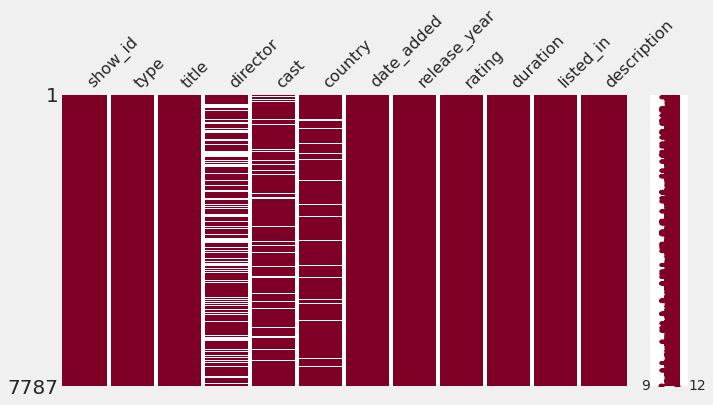

In [95]:
mno.matrix(nf,figsize=(10,5),color=(0.5,0.0,0.15))


### ***Comment:- There are misisng values present in the features such as director,cast,country & date_added.***

In [96]:
#Dropping null values -
nf.dropna( how='any',subset=['cast', 'director'])
nf.drop_duplicates(inplace=True)

In [97]:
# To remove the missing values-
nf.dropna(axis=0,inplace=True)
nf.shape

(4808, 12)

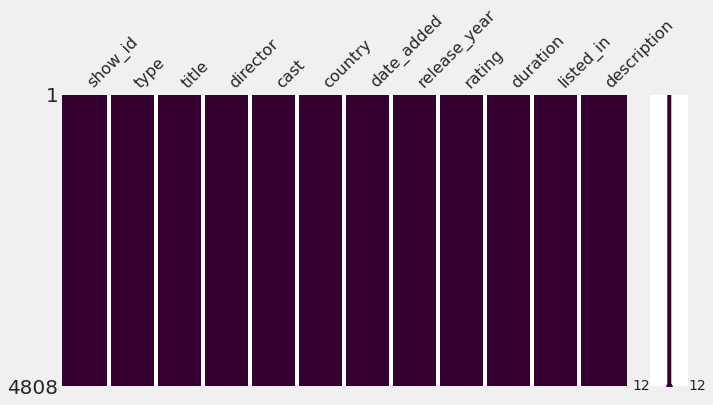

In [98]:
#Visualization after removing NAN values from the dataset-
mno.matrix(nf,figsize=(10,5),color=(0.2,0.0,0.19))

## **Converting into a proper date-time format and adding two more features year and month.**

In [99]:
nf["date_added"] = pd.to_datetime(nf['date_added'])
nf['day_added'] = nf['date_added'].dt.day
nf['year_added'] = nf['date_added'].dt.year
nf['month_added']=nf['date_added'].dt.month
nf['year_added'].astype(int);
nf['day_added'].astype(int);
nf['date_added'].astype(int);


In [100]:
#Finding seasons from durations
nf['season_count'] = nf.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)
nf['duration'] = nf.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)

In [101]:
#Renaming the ‘listed_in’ feature to the genre for easy use.
nf = nf.rename(columns={"listed_in":"genere"})
nf['genere'] = nf['genere'].apply(lambda x: x.split(",")[0])



In [102]:
# Cleaned dataset -
nf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genere,description,day_added,year_added,month_added,season_count
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,Dramas,After a devastating earthquake hits Mexico Cit...,23,2016,12,
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,Horror Movies,"When an army recruit is found dead, his fellow...",20,2018,12,
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",16,2017,11,
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,1,2020,1,
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,,International TV Shows,A genetics professor experiments with a treatm...,1,2017,7,1


In [103]:
nf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4808 entries, 1 to 7783
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       4808 non-null   object        
 1   type          4808 non-null   object        
 2   title         4808 non-null   object        
 3   director      4808 non-null   object        
 4   cast          4808 non-null   object        
 5   country       4808 non-null   object        
 6   date_added    4808 non-null   datetime64[ns]
 7   release_year  4808 non-null   int64         
 8   rating        4808 non-null   object        
 9   duration      4808 non-null   object        
 10  genere        4808 non-null   object        
 11  description   4808 non-null   object        
 12  day_added     4808 non-null   int64         
 13  year_added    4808 non-null   int64         
 14  month_added   4808 non-null   int64         
 15  season_count  4808 non-null   object  

In [104]:
#After data cleaning the dataset look like this

#Let’s see the disribution of data

nf.describe(include='O')

,show_id,type,title,director,cast,country,rating,duration,genere,description,season_count
count,4808,4808,4808,4808,4808,4808,4808,4808,4808,4808,4808
unique,4808,2,4808,3613,4688,544,14,187,32,4803,10
top,s2,Movie,7:19,"Raúl Campos, Jan Suter",Samuel West,United States,TV-MA,,Dramas,A scheming matriarch plots to cut off her disa...,
freq,1,4673,1,18,10,1653,1665,135,1342,2,4673


# ***1.Data Visualization***

## **Distribution of Rating and finding what audience prefer to watch.**

To know which type of content is most watched by the audience so that Netflix can decide what type of content to be released next. It helps Netflix to understand the most and least favourite content watched by an audience.

In [105]:
df_rating = pd.DataFrame(nf['rating'].value_counts()).reset_index().rename(columns={'index':'rating','rating':'count'})
fig_bar = px.bar(df_rating, y='rating', x='count', title='Distribution of Rating',
color_discrete_sequence=['#b20710'], text='count')
fig_bar.update_xaxes(showgrid=False)
fig_bar.update_yaxes(showgrid=False, categoryorder='total ascending', ticksuffix=' ', showline=False)
fig_bar.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))
fig_bar.update_layout(margin=dict(t=80, b=0, l=70, r=40),
hovermode="y unified",
xaxis_title=' ', yaxis_title=" ", height=400,
plot_bgcolor='#333', paper_bgcolor='#333',
title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
font=dict(color='#8a8d93'),
legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5),
hoverlabel=dict(bgcolor="black", font_size=13, font_family="Lato, sans-serif")) 

### The audience prefers TV-MA and TV-14 shows more and the least preferred rating shows are Nc-17.  Most of the content watched by the audience is for a mature audience. The TV-MA rating is a type of rating given by the TV parental guidelines to a television program.
### The second largest type of rating watched by the audience is TV-14 which is inappropriate for children younger than age 14. The conclusion is drawn here is most of the audience is of mature age.

**Top 5 Producer Countries**

In [106]:
country= nf['country'].value_counts().reset_index()
country.rename(columns={'index' : 'Production_countries'}, inplace= True)
country.rename(columns={'country' : 'count'}, inplace= True)
country.head()

,Production_countries,count
0,United States,1653
1,India,832
2,United Kingdom,174
3,Canada,104
4,Egypt,87


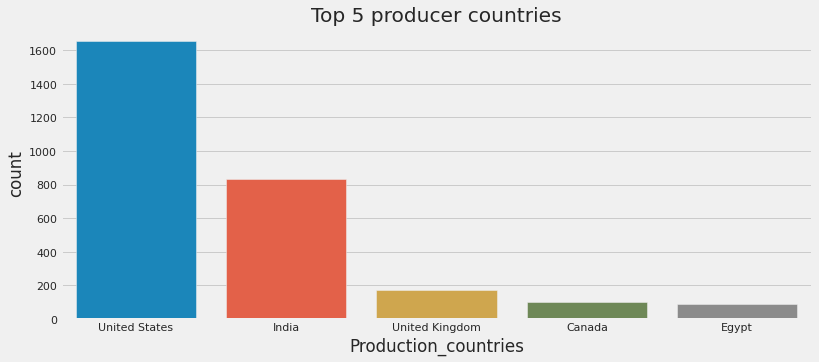

In [107]:
plt.figure(figsize=(12,5))
plt.title('Top 5 producer countries')
sns.barplot(x='Production_countries',y= 'count', data= country[:5])

## Finding the highest watched genres on Netflix

To know more about the distribution of genres and see which type of content do audience prefers to watch. So Netflix can decide and take movies or tv shows of the highest watched genres which will benefit Netflix in a long run.

In [108]:
genere_name= nf['genere'].value_counts().reset_index()
genere_name.rename(columns={'index' : 'genere_name'}, inplace= True)
genere_name.rename(columns={'genere' : 'count'}, inplace= True)
genere_name

,genere_name,count
0,Dramas,1342
1,Comedies,1029
2,Action & Adventure,696
3,Children & Family Movies,421
4,Documentaries,352
5,Stand-Up Comedy,276
6,Horror Movies,239
7,International Movies,100
8,Classic Movies,69
9,Thrillers,49


In [109]:
fig_tree = px.treemap(genere_name, path=[px.Constant("Distribution of Genere"), 'count','genere_name'])
fig_tree.update_layout(title='Highest watched Generes on Netflix',
                  margin=dict(t=50, b=0, l=70, r=40),
                  plot_bgcolor='#333', paper_bgcolor='#333',
                  title_font=dict(size=25, color='#fff', family="Lato, sans-serif"),
                  font=dict(color='#8a8d93'),
                  hoverlabel=dict(bgcolor="#444", font_size=13, font_family="Lato, sans-serif"))

**Drama is the highest preferred show by the audience then comes the comedy show and action show, the least preferred show is of LGBTQ movies.**

## **2] Understanding what type content is available in different countries**

In [110]:
fig_donut = px.pie(nf, names='type', height=300, width=600, hole=0.7,
title='Most watched on Netflix',
color_discrete_sequence=['#b20710', '#221f1f'])
fig_donut.update_traces(hovertemplate=None, textposition='outside',
textinfo='percent+label', rotation=90)
fig_donut.update_layout(margin=dict(t=60, b=30, l=0, r=0), showlegend=False,
plot_bgcolor='#333', paper_bgcolor='#333',
title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
font=dict(size=17, color='#8a8d93'),
hoverlabel=dict(bgcolor="#444", font_size=13,font_family="Lato, sans-serif"))


In [111]:
m_s_groups = nf.groupby(["title", "type", "country",]).apply(lambda df: df.date_added) #Returns Pandas Series with movie / series title and original index
m_s_groups.head(40)

title                                  type   country                        
#Alive                                 Movie  South Korea                  27   2020-09-08
#AnneFrank - Parallel Stories          Movie  Italy                        28   2020-07-01
#FriendButMarried                      Movie  Indonesia                    31   2020-05-21
#FriendButMarried 2                    Movie  Indonesia                    32   2020-06-28
#Roxy                                  Movie  Canada                       34   2019-04-10
#Selfie                                Movie  Romania                      36   2019-06-01
#Selfie 69                             Movie  Romania                      37   2019-06-01
#realityhigh                           Movie  United States                33   2017-09-08
1 Chance 2 Dance                       Movie  United States                46   2017-07-01
1 Mile to You                          Movie  United States                47   2017-07-07
10 Days in S

**Because the quantity of movies outnumbers the number of TV series. It appears that movies are most widely available in various countries.**

## **3] Is Netflix has increasingly focusing on TV rather than movies in recent years.**

In [112]:
d1 = nf[nf["type"] == "TV Show"]
d2 = nf[nf["type"] == "Movie"]
col = "year_added"
vc1 = d1[col].value_counts().reset_index().rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)
vc2 = d2[col].value_counts().reset_index().rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)
trace1 = go.Scatter(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="orange"), )
trace2 = go.Scatter(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#b20710"))
data = [trace1, trace2]
fig_line = go.Figure(data)
fig_line.update_traces(hovertemplate=None)
fig_line.update_xaxes(showgrid=False)
fig_line.update_yaxes(showgrid=False)
large_title_format = 'Tv Show and Movies impact over the Year'
small_title_format = "Due to Covid updatation of content is slowed." 
fig_line.update_layout(title=large_title_format + " " + small_title_format, 
    height=400, margin=dict(t=130, b=0, l=70, r=40), 
    hovermode="x unified", xaxis_title=' ', 
    yaxis_title=" ", plot_bgcolor='#333', paper_bgcolor='#333', 
    title_font=dict(size=25, color='#8a8d93',
    family="Lato, sans-serif"),
    font=dict(color='#8a8d93'),
    legend=dict(orientation="h",
    yanchor="bottom",
    y=1,
    xanchor="center",
    x=0.5)) 
fig_line.add_annotation(dict
    (x=0.8, 
    y=0.3,
    ax=0, 
    ay=0,
    xref = "paper",
    yref = "paper",
    text= "Highest number of Tv Shows were released in 2019 followed by 2017." )) 
fig_line.add_annotation(dict
    (x=0.9, 
    y=1,
    ax=0,
    ay=0,
    xref = "paper",
    yref = "paper",
    text= "Highest number of Movies were relased in 2019 followed by 2020" )) 
fig_line.show()


**After the year 2019 covid came that badly affects Netflix for producing content. Movies have exponential growth from the start but due to covid, it is going downwards.**

---



In [113]:
from collections import Counter

#Define displayed years:
years = list(range(2008,2020,1))

#separate movies and tv_shows:
movie_rows = nf.loc[nf["type"] == "Movie"]
tv_rows = nf.loc[nf["type"] == "TV Show"]

#Count movies / tv shows per year
movies_counts = movie_rows.release_year.value_counts()
tv_counts = tv_rows.release_year.value_counts()

index_years_mov = movies_counts.index.isin(years)
index_years_tv = tv_counts.index.isin(years)

#select movies / tv shows between chosen years:
movies = movies_counts[index_years_mov]
tv_shows = tv_counts[index_years_tv]

# Calculate percentages of movies and tv shows:
movies_per = round(movie_rows.shape[0] / nf["type"].shape[0] * 100, 2)
tvshows_per = round(tv_rows.shape[0] / nf["type"].shape[0] * 100, 2)


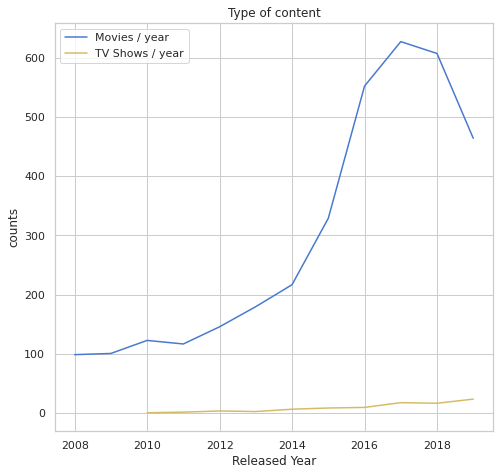

In [114]:
width = 0.75

sns.set(style="whitegrid", palette="muted", color_codes=True)

# Set up the matplotlib figure
plt.subplots(figsize=(7,7), sharex=False) 
plt.xlabel("Released Year")
plt.ylabel("counts")
plt.title("Type of content")      
#Line plot of Movies and TV Shows released by Netflix per year")
sns.lineplot(data=movies, color="b", label="Movies / year")
sns.lineplot(data=tv_shows,color="y",  label="TV Shows / year")



## **Hypothesis from the data visualized**

**1. According to the first graph, the number of TV shows launched in the previous few years is growing.**

**2. According to the second graph, the number of TV shows added to Netflix is stable.**

## 4] Clustering similar content by matching text-based features

In [115]:
nf['genere'].value_counts()
nf['genere'].value_counts().size
#Too much classes, we just obtain the first 50 (the most common 50)
content_type=nf['genere'].value_counts().iloc[0:50]

#Unify some of the similiar types by the "strongest wins" criterium:
#We dont need to diferenciate between international series, or TV/Movies dramas, we have other columns to do so

netflix=nf.replace({'genere': 'Dramas, Independent Movies, International Movies'}, {'genere': 'Dramas'},regex=True)
netflix=nf.replace({'genere': 'Dramas, International Movies'}, {'genere': 'Dramas'},regex=True)
netflix=nf.replace({'genere': 'Dramas, Independent Movies'}, {'genere': 'Dramas'},regex=True)
netflix=nf.replace({'genere': 'TV Dramas'}, {'genere': 'Dramas'},regex=True)
netflix=nf.replace({'genere': 'International TV Shows, TV Dramas'}, {'genere': 'Dramas'},regex=True)

#For documentaries
netflix=nf.replace({'genere':'Documentaries, International Movies'}, {'genere': 'Documentaries'},regex=True) 

#For horror movies
netflix=nf.replace({'genere':'Horror Movies, International Movies,'}, {'genere': 'Horror Movies'},regex=True)
netflix=nf.replace({'genere':'Horror Movies, Thrillers'}, {'genere': 'Horror Movies'},regex=True)

#Thrillers
netflix=nf.replace({'genere':'Dramas, Thrillers'}, {'genere': 'Thrillers'},regex=True)
netflix=nf.replace({'genere':'International Movies, Thrillers'}, {'genere': 'Thrillers'},regex=True)

#Action
netflix=nf.replace({'genere':'Action & Adventure, International Movies '}, {'genere': 'Action & Adventure'},regex=True)
netflix=nf.replace({'genere':'Action & Adventure, Dramas'}, {'genere': 'Action & Adventure'},regex=True)

#Comedies in 3 groups: comedies, drama/comedies and romantic/comedies
netflix=nf.replace({'genere':'Stand-Up Comedy'}, {'genere': 'Comedies'},regex=True)
netflix=nf.replace({'genere':'Action & Adventure, Comedies, International Movies'}, {'genere': 'Comedies'},regex=True)
netflix=nf.replace({'genere':'TV Comedies'}, {'genere': 'Comedies'},regex=True)
netflix=nf.replace({'genere':'Comedies, International Movies'}, {'genere': 'Comedies'},regex=True)
netflix=nf.replace({'genere':'Comedies, Dramas, Independent Movies'}, {'genere': 'Comedies, Dramas'},regex=True)
netflix=nf.replace({'genere':'Comedies, International Movies, Romantic Movies'}, {'genere': 'Comedies, Romantic Movies'},regex=True)

#Kids TV all in one
netflix=nf.replace({'genere': "Kids' TV, TV Comedies"}, {'genere': "Kids' TV"},regex=True)
netflix=nf.replace({'genere': "Kids' TV, Comedies"}, {'genere': "Kids' TV"},regex=True)
netflix=nf.replace({'genere': "Children & Family Movies, Comedies"}, {'genere': "Children & Family Movies"},regex=True)


#We have to delete the instances with listed_in: Movies. They dont give information and wont be useful in future
netflix=nf[nf['genere'] != 'Movies']

content_type=nf['genere'].value_counts().iloc[0:50]

In [116]:
#We delete some features, we prepare the df to feed the clustering algorithms.

netflix=nf.dropna(axis=0)
netflix.drop(netflix.iloc[:,[0,2,4,6,8,9,11,12,14,15]],axis=1,inplace=True)

#Form a full numerical valued dataset:
# Type
netflix['type']=netflix['type'].astype('category')
d1 = dict(enumerate(netflix['type'].cat.categories)) #To save old values
netflix['type']=netflix['type'].cat.codes

#Director
netflix['director']=netflix['director'].astype('category')
d2 = dict(enumerate(netflix['director'].cat.categories)) #To save old values
netflix['director']=netflix['director'].cat.codes

#Country
netflix['country']=netflix['country'].astype('category')
d3 = dict(enumerate(netflix['country'].cat.categories)) #To save old values
netflix['country']=netflix['country'].cat.codes

# Listed_in
netflix['genere']=netflix['genere'].astype('category')
d4= dict(enumerate(netflix['genere'].cat.categories)) #To save old values
netflix['genere']=netflix['genere'].cat.codes

netflix.head()

,type,director,country,release_year,genere,year_added
1,0,1635,239,2016,12,2016
2,0,1141,296,2011,13,2018
3,0,3074,440,2009,0,2017
4,0,2826,440,2008,12,2020
5,1,3050,357,2016,16,2017


## ***Let's observe the correlation in dataset***

In [117]:
corr_matrix = nf.corr()
corr_matrix

,release_year,day_added,year_added,month_added
release_year,1.000000,0.138184,0.019742,-0.035220
day_added,0.138184,1.000000,0.022937,0.057797
year_added,0.019742,0.022937,1.000000,-0.146984
month_added,-0.035220,0.057797,-0.146984,1.000000


(4.5, -0.5)

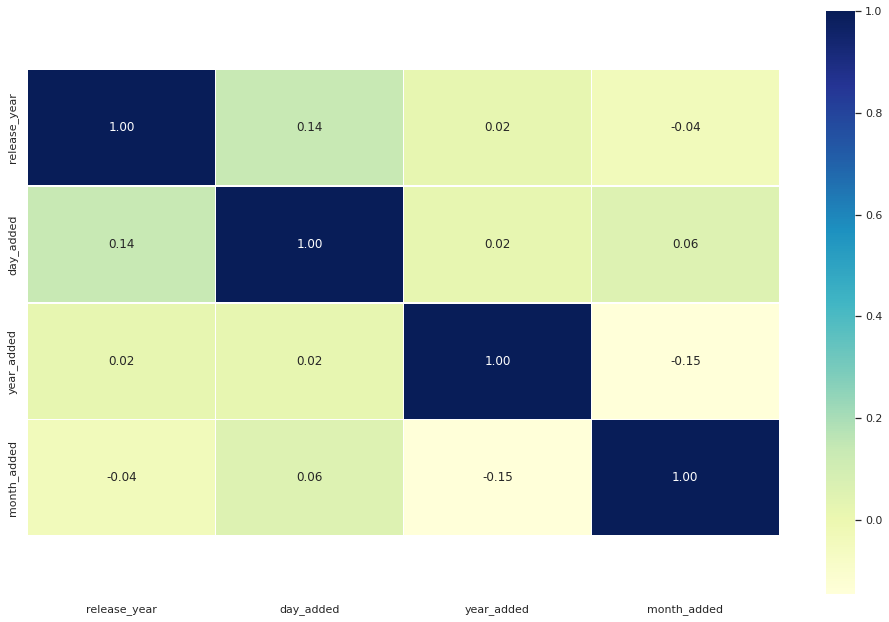

In [118]:
# Let's make our correlation matrix a little prettier
#visualization of the correlation in the heatmap
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)